In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


anime_data = pd.read_csv('animes.csv')
print(anime_data.head())


     uid                             title  \
0  28891           Haikyuu!! Second Season   
1  23273           Shigatsu wa Kimi no Uso   
2  34599                     Made in Abyss   
3   5114  Fullmetal Alchemist: Brotherhood   
4  31758  Kizumonogatari III: Reiketsu-hen   

                                            synopsis  \
0  Following their participation at the Inter-Hig...   
1  Music accompanies the path of the human metron...   
2  The Abyss—a gaping chasm stretching down into ...   
3  "In order for something to be obtained, someth...   
4  After helping revive the legendary vampire Kis...   

                                               genre  \
0  ['Comedy', 'Sports', 'Drama', 'School', 'Shoun...   
1  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
2  ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...   
3  ['Action', 'Military', 'Adventure', 'Comedy', ...   
4   ['Action', 'Mystery', 'Supernatural', 'Vampire']   

                          aired  episodes  member

In [38]:
# Get information about the data
anime_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [39]:
# Describe the data
anime_data.describe()

,uid,episodes,members,popularity,ranked,score
count,19311.000000,18605.000000,1.931100e+04,19311.000000,16099.000000,18732.000000
mean,19358.904096,11.460414,3.472609e+04,7720.830304,6866.524194,6.436107
std,14271.446515,47.950386,1.121772e+05,4676.786104,4390.018768,1.007941
min,1.000000,1.000000,2.500000e+01,1.000000,1.000000,1.250000
25%,4833.500000,1.000000,3.880000e+02,3725.000000,2895.500000,5.770000
50%,18327.000000,2.000000,2.389000e+03,7539.000000,6963.000000,6.410000
75%,33896.500000,12.000000,1.450150e+04,11613.000000,10601.500000,7.150000
max,40960.000000,3057.000000,1.871043e+06,16338.000000,14675.000000,9.230000


In [40]:
anime_data.isnull().sum()


uid              0
title            0
synopsis       975
genre            0
aired            0
episodes       706
members          0
popularity       0
ranked        3212
score          579
img_url        180
link             0
dtype: int64

In [41]:
from scipy import stats

# Calculate z-scores for the "ranked" and "score" columns
z_scores_ranked = stats.zscore(anime_data['ranked'])
z_scores_score = stats.zscore(anime_data['score'])

# Check for outliers
outliers_ranked = (z_scores_ranked > 3) | (z_scores_ranked < -3)
outliers_score = (z_scores_score > 3) | (z_scores_score < -3)

# Print the number of outliers
print("Number of outliers in 'ranked' column:", outliers_ranked.sum())
print("Number of outliers in 'score' column:", outliers_score.sum())


Number of outliers in 'ranked' column: 0
Number of outliers in 'score' column: 0


In [42]:
anime_data['score'] = anime_data['score'].interpolate()
anime_data.isnull().sum()

uid              0
title            0
synopsis       975
genre            0
aired            0
episodes       706
members          0
popularity       0
ranked        3212
score            0
img_url        180
link             0
dtype: int64

In [43]:
anime_data.dropna(subset=['synopsis', 'episodes', 'ranked', 'img_url'], inplace=True)
anime_data

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


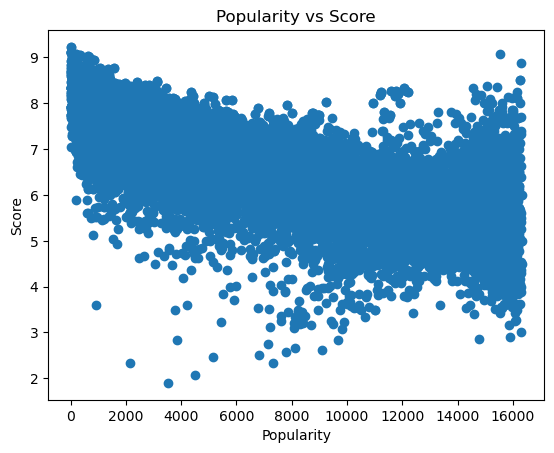

In [44]:
# Scatter plot of popularity vs score
plt.scatter(anime_data['popularity'], anime_data['score'])

# Set the plot title and labels
plt.title('Popularity vs Score')
plt.xlabel('Popularity')
plt.ylabel('Score')

# Show the plot
plt.show()


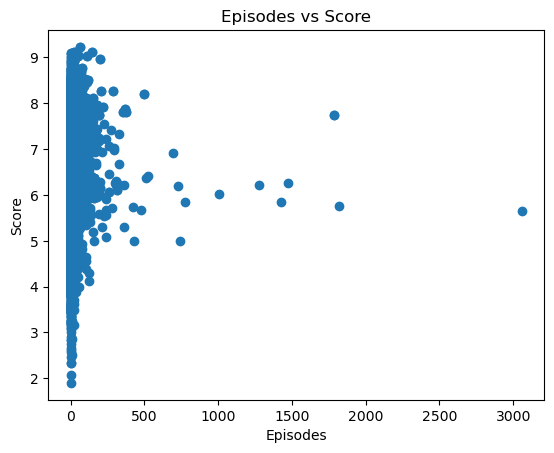

In [45]:
plt.scatter(anime_data['episodes'], anime_data['score'])
plt.title('Episodes vs Score')
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.show()


In [46]:
correlation = anime_data['episodes'].corr(anime_data['score'])
print("Correlation between episodes and score:", correlation)


Correlation between episodes and score: 0.07466317481197757


<Axes: >

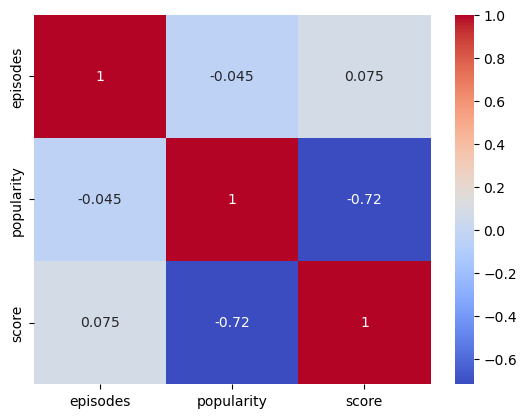

In [47]:
import seaborn as sns

# Select the columns for the heatmap
heatmap_data = anime_data[['episodes', 'popularity', 'score']]

# Plot the heatmap
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm')


In [48]:
anime_data.shape

(15187, 12)

In [49]:
#Multivariate Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select the features and target variable
features = anime_data[['episodes', 'popularity']]
target = anime_data['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import mean_squared_error


Mean Squared Error: 0.5463397234507983
